# Welcome to the Biopython Workshop!
**Presented By:** Michael Remington

## What is Bioinformatics?

Bioinformatics is a highly interdisiplinary field combines: biology, computer science, mathematics, and statistics to analyze and interpret biological data.

Computational tools and techniques to understand biological systems, processes, and relationships.

Use Cases:
- Evolutionary Biology and Species relationships
- Medical applications such as drug discovery or studying disease
- Agriculture Research


Types of Analysis:
- Parse files
- Analysis of genomic sequences, protein structures, or gene expression data
- Storing, retrieving, and organizing biological information in databases
- Sequence Analysis: Analyzing DNA, RNA, Regulatory elements
- Comparing sequences to find evolutionary relationships
- Analyzing 3D structures of biomolecules 
- Modeling molecular interactions
- Identifying genes, coding regions

## What is Biopython?

Biopython is a library in python that has a suite of bioinformatics and molecular biology tools. 

    Documentation: https://biopython.org/
    Further reading: https://www.bioinformatics.org/bradstuff/bp/tut/Tutorial.pdf

In [2]:
'''
Here we import classes and functions from biopython we will need for analysis.
'''
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Align

## Seq and Seqid Objects

In [5]:
## Working with Sequences
gene = 'ATATATAAGTACACTGGT'
print(type(gene))
my_seq = Seq(gene)
print(type(my_seq))
print(my_seq)

<class 'str'>
<class 'Bio.Seq.Seq'>
ATATATAAGTACACTGGT


In [20]:
for index, letter in enumerate(my_seq):
    print("%i %s" % (index, letter))

0 A
1 T
2 A
3 T
4 A
5 T
6 A
7 A
8 G
9 T
10 A
11 C
12 A
13 C
14 T
15 G
16 G
17 T


In [6]:
# Seq functionality
print(f"Reverse complement: {my_seq.reverse_complement()}")
print(f"Transcription: {my_seq.transcribe()}")
print(f"Translation: {my_seq.translate()}")
print(f"Count of Nucleotides: {len(my_seq)}")

Reverse complement: ACCAGTGTACTTATATAT
Transcription: AUAUAUAAGUACACUGGU
Translation: IYKYTG
Count of Nucleotides: 18


In [7]:
# Perform Operations 
start_codon = Seq("ATG")
stop_codon = Seq("TAA")
new_sequence = start_codon + my_seq + stop_codon
print(f"Reverse complement: {new_sequence.reverse_complement()}")
print(f"Transcription: {new_sequence.transcribe()}")
print(f"Translation: {new_sequence.translate()}")
print(f"Count of Nucleotides: {len(new_sequence)}")

Reverse complement: TTAACCAGTGTACTTATATATCAT
Transcription: AUGAUAUAUAAGUACACUGGUUAA
Translation: MIYKYTG*
Count of Nucleotides: 24


In [9]:
# Create a SeqRecord object with additional metadata
from Bio.SeqRecord import SeqRecord
seq_record = SeqRecord(
    new_sequence,
    id="ABC123",
    name="Sample Sequence",
    description="This is a sample SeqRecord"
)

# Accessing SeqRecord attributes
print("ID:", seq_record.id)
print("Name:", seq_record.name)
print("Description:", seq_record.description)
print("Sequence:", seq_record.seq)

ID: ABC123
Name: Sample Sequence
Description: This is a sample SeqRecord
Sequence: ATGATATATAAGTACACTGGTTAA


## Descriptive statistics

In [10]:
# Nucleotide Composition

def nucleotide_composition(seq):
    a_content = seq.count("A") / len(seq) * 100
    t_content = seq.count("T") / len(seq) * 100
    g_content = seq.count("G") / len(seq) * 100
    c_content = seq.count("C") / len(seq) * 100
    return a_content, t_content, g_content, c_content

seq_1 = Seq("ATATATAAGTACACTGGT")
seq_2 = Seq("TGATAGCGCAGTACACCCCAGT")

seq_1_A, seq_1_T, seq_1_G, seq_1_C = nucleotide_composition(seq=seq_1)
seq_2_A, seq_2_T, seq_2_G, seq_2_C = nucleotide_composition(seq=seq_2)

print(f'Sequence 1 - As: {seq_1_A:.2f}, Ts: {seq_1_T:.2f}, Cs: {seq_1_G:.2f}, Gs: {seq_1_C:.2f}')
print(f'Sequence 2 - As: {seq_2_A:.2f}, Ts: {seq_2_T:.2f}, Cs: {seq_2_G:.2f}, Gs: {seq_2_C:.2f}')

Sequence 1 - As: 38.89, Ts: 33.33, Cs: 16.67, Gs: 11.11
Sequence 2 - As: 27.27, Ts: 18.18, Cs: 22.73, Gs: 31.82


In [11]:
# GC Content
from Bio.SeqUtils import gc_fraction

seq_1_gc = gc_fraction(seq_1) # Convert fraction to percentage
seq_2_gc = gc_fraction(seq_2)

print(f'Sequence 1 - GC: {seq_1_gc:.2f}')
print(f'Sequence 2 - GC: {seq_2_gc:.2f}')

Sequence 1 - GC: 0.28
Sequence 2 - GC: 0.55


In [15]:
# k-mer count
from collections import Counter


def count_kmers(sequence, k):
    return Counter([str(sequence[i:i+k]) for i in range(len(sequence) - k + 1)])

# Count 3-mers
k = 2
kmer_counts = count_kmers(seq_2, k)

# Print k-mer counts
print(f"{k}-mer Counts:")
for kmer, count in kmer_counts.items():
    print(f"{kmer}: {count}")

2-mer Counts:
TG: 1
GA: 1
AT: 1
TA: 2
AG: 3
GC: 2
CG: 1
CA: 3
GT: 2
AC: 2
CC: 3


Common 3-mers: {'ACA', 'TAC', 'GTA', 'ATA', 'CAC', 'AGT'}


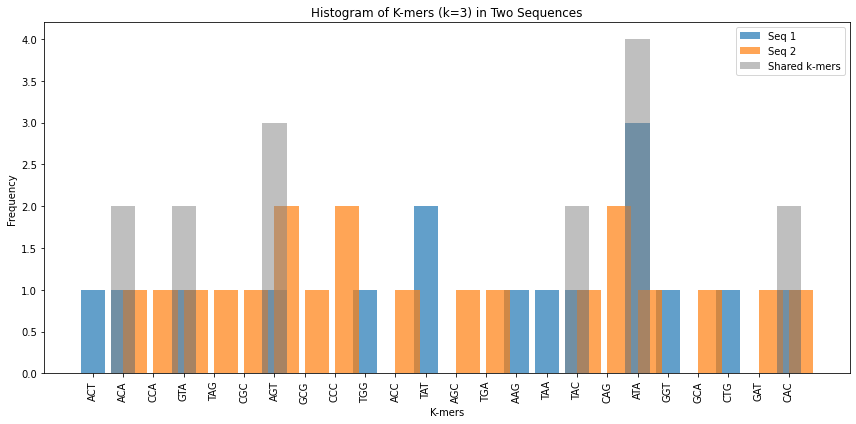

In [19]:
# comparing k-mer values between sequences
import matplotlib.pyplot as plt
k = 3
seq1_kmers = count_kmers(seq_1, k)
seq2_kmers = count_kmers(seq_2, k)


common_kmers = seq1_kmers.keys() & seq2_kmers.keys()
print(f"Common 3-mers: {common_kmers}")

shared_kmers = set(seq1_kmers.keys()).intersection(seq2_kmers.keys())


all_kmers = set(seq1_kmers.keys()).union(seq2_kmers.keys())
seq1_values = [seq1_kmers[kmer] for kmer in all_kmers]
seq2_values = [seq2_kmers[kmer] for kmer in all_kmers]
shared_values = [seq1_kmers.get(kmer, 0) + seq2_kmers.get(kmer, 0) if kmer in shared_kmers else 0 for kmer in all_kmers]


plt.figure(figsize=(12, 6))


plt.bar(range(len(all_kmers)), seq1_values, label="Seq 1", alpha=0.7, align='center')

plt.bar(range(len(all_kmers)), seq2_values, label="Seq 2", alpha=0.7, align='edge')

plt.bar(range(len(all_kmers)), shared_values, label="Shared k-mers", alpha=0.5, color='grey')


plt.xticks(range(len(all_kmers)), list(all_kmers), rotation=90)
plt.xlabel("K-mers")
plt.ylabel("Frequency")
plt.title(f"Histogram of K-mers (k={k}) in Two Sequences")
plt.legend()


plt.tight_layout()
plt.show()

## File Parsers

- There are several common file formats:
    - FASTA, FASTQ, GenBank, PDB, Nexus, and more.
- Computational constraints, Sequence files can be huge!
    - Sequential vs Indexed Parsing
- We may only want to analyze parts of a sequence or subsets.
- Parsers that handle fragmented sequences and missing data



Bio.SeqIO

    Handles sequence file formats like FASTA, GenBank, EMBL, etc.
    Suitable for single or multiple sequence files.
    Provides both reading and writing functionalities.

Bio.AlignIO

    Deals with multiple sequence alignment file formats like Clustal, Stockholm, PHYLIP, etc.

Bio.PDB

    Specialized for parsing and handling Protein Data Bank (PDB) files.

Bio.SearchIO

    Parses output from sequence search tools like BLAST and HMMER.

Bio.Entrez

    Retrieves data from NCBI databases in formats like FASTA, GenBank, or XML.

Bio.Motif / Bio.SeqUtils

    Parses motif files and sequence utilities for specialized formats.

In [26]:
# Sequential Parsing
fasta_fp = "data/orchid.fasta"

for record in SeqIO.parse(fasta_fp, "fasta"):
    print(f"ID: {record.id}, Length: {len(record.seq)}")

ID: gi|2765658|emb|Z78533.1|CIZ78533, Length: 740
ID: gi|2765657|emb|Z78532.1|CCZ78532, Length: 753
ID: gi|2765656|emb|Z78531.1|CFZ78531, Length: 748
ID: gi|2765655|emb|Z78530.1|CMZ78530, Length: 744
ID: gi|2765654|emb|Z78529.1|CLZ78529, Length: 733
ID: gi|2765652|emb|Z78527.1|CYZ78527, Length: 718
ID: gi|2765651|emb|Z78526.1|CGZ78526, Length: 730
ID: gi|2765650|emb|Z78525.1|CAZ78525, Length: 704
ID: gi|2765649|emb|Z78524.1|CFZ78524, Length: 740
ID: gi|2765648|emb|Z78523.1|CHZ78523, Length: 709
ID: gi|2765647|emb|Z78522.1|CMZ78522, Length: 700
ID: gi|2765646|emb|Z78521.1|CCZ78521, Length: 726
ID: gi|2765645|emb|Z78520.1|CSZ78520, Length: 753
ID: gi|2765644|emb|Z78519.1|CPZ78519, Length: 699
ID: gi|2765643|emb|Z78518.1|CRZ78518, Length: 658
ID: gi|2765642|emb|Z78517.1|CFZ78517, Length: 752
ID: gi|2765641|emb|Z78516.1|CPZ78516, Length: 726
ID: gi|2765640|emb|Z78515.1|MXZ78515, Length: 765
ID: gi|2765639|emb|Z78514.1|PSZ78514, Length: 755
ID: gi|2765638|emb|Z78513.1|PBZ78513, Length: 742


In [35]:
# Access a specific sequence by ID
record_dict = SeqIO.index(fasta_fp, "fasta")


seq_record = record_dict["gi|2765592|emb|Z78467.1|PSZ78467"]
print(f"ID: {seq_record.id}, \n  Sequence: {seq_record.seq}") 

ID: gi|2765592|emb|Z78467.1|PSZ78467, 
  Sequence: CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCAGTTTACTTTGGTCACCCATGGGCATCTGCTCTTGCAGTGACCTGGATTTGCCATCGAGCCTCCTTGGGAGCTTTCTTGCTGGCGATCTAAACCCTTGCCCGGCGCAGTTTTGCGCCAAGTCATATGACACATAATTGGAAGGGGGTGGCATGCTGCCTTGACCCTCCCCAAATTATTTTTTGACAACTCTCAGCAACGGATATCTCGGCTCTTGCATCGATGAAGAACGCAGCGAAATGCGATAAATGGTGTGAATTGCAGAATCCCGTGAACCATCGAGTCTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCCAAGGGTACGCCTGCCTGGGCATTGCGAGTCATATCTCTCCCTTAATGAGGCTGTCCATACATACTGTTCAGCCGGTGCGGATGTGAGTTTGGCCCCTTGTTCTTTGGTACGGGGGGTCTAAGAGCTGCATGTGCCTTTGGTGGTCCAAAATACGGCAAGAGGTGGACGAACTATGCTACAACAAAATTGTTGTGCGAATGACCCGGGTTGTCGTATTAGCTGGGCCAGCATAATCTAAAGACCCTCTTGAACCCCATTGGAGGCCCATCAACCCATGATCAGTTGACGGCCATATGTTTGCGACCCAGGTCAGGTGAGGCAACCCGCTGA


In [38]:
# Read genbank file
for seq_record in SeqIO.parse("data/ls_orchid.gbk", "genbank"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG')
709
Z78522.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG')
700
Z78521.1
Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC')
726
Z78520.1
Seq('CGTAACAAGGTTTC

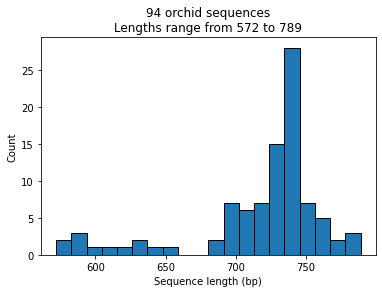

In [40]:
# Analyzing many Sequences!
sizes = [len(rec) for rec in SeqIO.parse(fasta_fp, "fasta")]
plt.hist(sizes, bins=20, edgecolor="black")

# Add a title and labels
plt.title(f"{len(sizes)} orchid sequences\nLengths range from {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")

# Show the plot
plt.show()

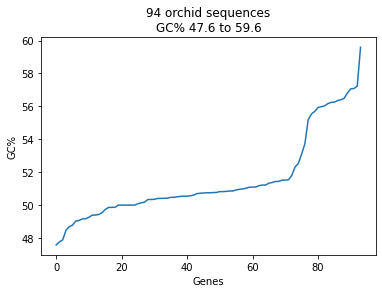

In [42]:
gc_values = sorted(
    100 * gc_fraction(rec.seq) for rec in SeqIO.parse(fasta_fp, "fasta")
)
plt.plot(gc_values)
plt.title(
    "%i orchid sequences\nGC%% %0.1f to %0.1f"
    % (len(gc_values), min(gc_values), max(gc_values))
)
plt.xlabel("Genes")
plt.ylabel("GC%")
plt.show()

## Sequence Alignments

Researchers align sequences for may reasons including analyzing sequence variation.

- What functions are shared among organisms?
- How have sequences evolved over time?
- What changes drive disease or adaptation?

There are several different types of alignments:

|                              |                                                                             |
|------------------------------|-----------------------------------------------------------------------------|
| **Pairwise Alignment**       | Compare two sequences to identify their similarity and differences.         |
| **Multiple Sequence Alignment (MSA)** | Compare multiple sequences to find conserved regions, motifs, and evolutionary relationships. |
| **Global Alignment**         | Align sequences over their entire length (e.g., similar-length sequences).  |
| **Local Alignment**          | Find regions of high similarity within longer, divergent sequences.         |



Biopython can do alignments on small datasets but for large datasets use programs such as: clustw, MUSCLE, geneious, or MAFFT. Native Biopython API use of these programs is depreciated

In [53]:
from Bio.Align import PairwiseAligner


seq1 = "ATCGTAC"
seq2 = "ATGGTAC"

aligner = PairwiseAligner()
aligner.mode = "global"  


alignments = aligner.align(seq1, seq2)

for index, alignment in enumerate(alignments):
    print(f'Alignment {index+1}')
    print(alignment)
    

Alignment 1
target            0 ATCG-TAC 7
                  0 ||-|-||| 8
query             0 AT-GGTAC 7

Alignment 2
target            0 ATC-GTAC 7
                  0 ||--|||| 8
query             0 AT-GGTAC 7

Alignment 3
target            0 AT-CGTAC 7
                  0 ||--|||| 8
query             0 ATG-GTAC 7

Alignment 4
target            0 ATCGTAC 7
                  0 ||.|||| 7
query             0 ATGGTAC 7



Alignment 1: Focuses on minimizing mismatches.

Alignment 2 & 3: Introduce gaps to improve alignment matches.

Alignment 4: No gaps but tolerates mismatches.

In [59]:
# You can customize aligners to penalize things such as gaps and mismatches

aligner = PairwiseAligner()
aligner.mode = "global"  


aligner.open_gap_score = -1 # Cost to open a gap
aligner.extend_gap_score = -1  # Cost to extend a gap
aligner.match_score = 2  # Reward for a match
aligner.mismatch_score = -3 # Penalty for a mismatch

alignments = aligner.align(seq1, seq2)

for index, alignment in enumerate(alignments):
    print(f'Alignment {index+1}')
    print(alignment)
    

Alignment 1
target            0 ATCG-TAC 7
                  0 ||-|-||| 8
query             0 AT-GGTAC 7

Alignment 2
target            0 ATC-GTAC 7
                  0 ||--|||| 8
query             0 AT-GGTAC 7

Alignment 3
target            0 AT-CGTAC 7
                  0 ||--|||| 8
query             0 ATG-GTAC 7



In [61]:
# Local alignment
seq1 = "ACCGTGCACGTTGACTGACACCGTGC"
seq2 = "GTGCATGAC"


aligner = PairwiseAligner()
aligner.mode = "local"  

alignments = aligner.align(seq1, seq2)

# Display all alignments
for index, alignment in enumerate(alignments):
    print(f"Alignment:{index+1}")
    print(f"Score: {alignment.score}")
    print(alignment)

Alignment:1
Score: 9.0
target            3 GTGCACGTTGAC 15
                  0 |||||--|-||| 12
query             0 GTGCA--T-GAC  9

Alignment:2
Score: 9.0
target            3 GTGCACGTTGAC 15
                  0 |||||---|||| 12
query             0 GTGCA---TGAC  9

Alignment:3
Score: 9.0
target            3 GTGCACGTTGACTGAC 19
                  0 |||||--|-||----| 16
query             0 GTGCA--T-GA----C  9

Alignment:4
Score: 9.0
target            3 GTGCACGTTGACTGAC 19
                  0 |||||---|||----| 16
query             0 GTGCA---TGA----C  9

Alignment:5
Score: 9.0
target            3 GTGCACGTTGACTGAC 19
                  0 |||||--|-|----|| 16
query             0 GTGCA--T-G----AC  9

Alignment:6
Score: 9.0
target            3 GTGCACGTTGACTGAC 19
                  0 |||||---||----|| 16
query             0 GTGCA---TG----AC  9

Alignment:7
Score: 9.0
target            3 GTGCACGTTGACTGAC 19
                  0 |||||--|-----||| 16
query             0 GTGCA--T-----GAC  9

Alignment:8
Scor